<a href="https://colab.research.google.com/github/danielarruda1000/machine_learn_previsao_letalidade_rj/blob/main/TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TCC**

**Título do Trabalho**:
Machine Learn: Modelo de previsão de taxa de letalidade violenta no estado do Rio de
Janeiro

**Resumo**: O trabalho visa aplicar 4 modelos estatísticos e comparar as metodologias e desempenho de cada um para prever a taxa de letalidade violenta no estado do Rio de Janeiro por 100 mil habitantes. Os modelos aplicados para esse trabalho, são eles: Arima(1,0,0), ARIMA(1,1,0), ARIMA(0,1,1) e ARIMA(2,1,0)

Nome: Daniel Nascimento Arruda |
Email: danielarruda1000@gmail.com | 
Whatsapp: 21984088497

#### Importando bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import (plot_acf, plot_pacf)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sns.set(rc={'figure.figsize':(10,5)})
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
%cd MyDrive/
%cd TCC

Mounted at /gdrive
/gdrive
/gdrive/MyDrive
/gdrive/MyDrive/TCC


#### Lendo os dados

In [4]:
df = pd.read_csv('BaseEstadoTaxaMes.csv', sep=';')
df = df[['ano','mes','mes_ano','letalidade_violenta']].rename(columns={'ano':'year','mes':"month"})
df['data'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df['letalidade_violenta'] = df['letalidade_violenta'].str.replace(',','.').astype(float)
df = df[(df['data'] >= pd.to_datetime('2005-01-01'))] # Dados a partir de 2005

In [5]:
df

,year,month,mes_ano,letalidade_violenta,data
24,2005,1,2005m01,4.67,2005-01-01
25,2005,2,2005m02,4.60,2005-02-01
26,2005,3,2005m03,5.32,2005-03-01
27,2005,4,2005m04,4.04,2005-04-01
28,2005,5,2005m05,4.49,2005-05-01
...,...,...,...,...,...
224,2021,9,2021m09,2.05,2021-09-01
225,2021,10,2021m10,2.32,2021-10-01
226,2021,11,2021m11,1.86,2021-11-01
227,2021,12,2021m12,1.73,2021-12-01


#### Analisando os dados

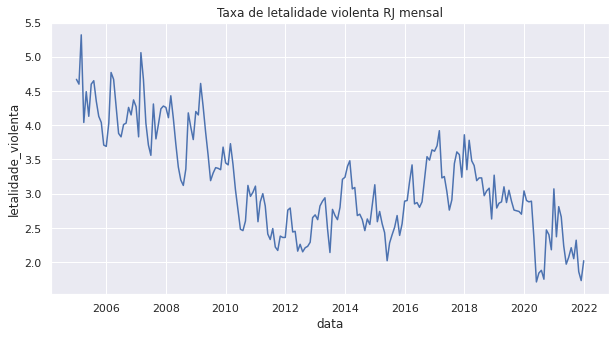

In [7]:
sns.lineplot(data=df, x='data', y='letalidade_violenta')
plt.title('Taxa de letalidade violenta RJ mensal')
plt.show()

		Decomposição da série temporal


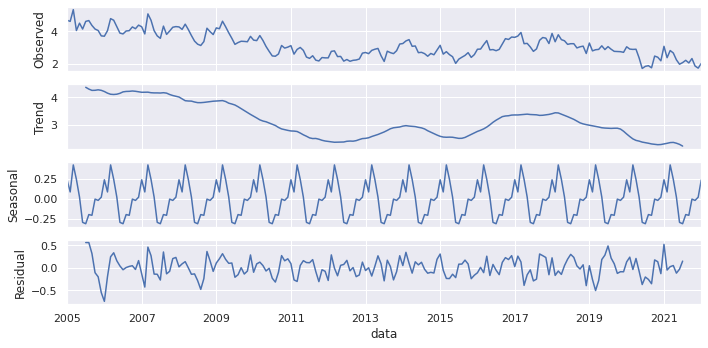

In [24]:
## Decomposição da série temporal
print('\t\tDecomposição da série temporal')
seasonal_decompose(df.set_index('data')['letalidade_violenta'], model='additive').plot()
plt.show()

ACF plot


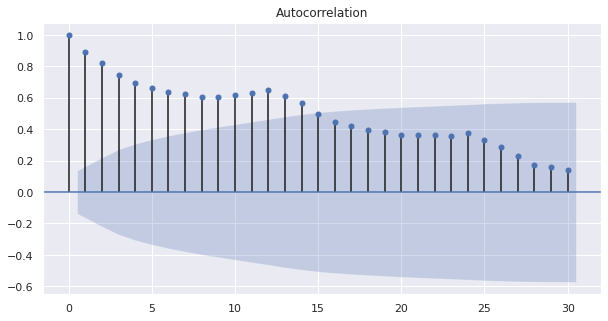

In [25]:
print('ACF plot')
plot_acf(df['letalidade_violenta'],lags=30)
plt.show()

In [29]:
print('Estatísticas gerais:')
df['letalidade_violenta'].describe()

Estatísticas gerais:


count    205.000000
mean       3.152780
std        0.750243
min        1.710000
25%        2.620000
50%        3.040000
75%        3.700000
max        5.320000
Name: letalidade_violenta, dtype: float64

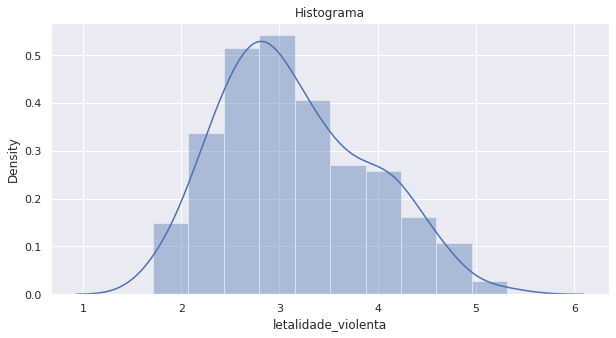

In [30]:
sns.distplot(df['letalidade_violenta'])
plt.title('Histograma')
plt.show()

In [12]:
# Teste de normalidade 
from scipy.stats import shapiro, normaltest

In [13]:
# Shapiro
stat, p = shapiro(df['letalidade_violenta'])
alpha = 0.05

print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
  print('The data looks Gaussian (Fail to reject null hypothesis)')
else:
  print('The data doe not look Gaussian (Reject H0) ')

Statistics=0.976, p=0.001
The data doe not look Gaussian (Reject H0) 


In [14]:
# D'Agostino's K^2

stat, p = normaltest(df['letalidade_violenta'])
alpha = 0.05

print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
  print('The data looks Gaussian (Fail to reject null hypothesis)')
else:
  print('The data doe not look Gaussian (Reject H0) ')

Statistics=8.760, p=0.013
The data doe not look Gaussian (Reject H0) 


In [15]:
# Transformação da série para normalizar
from scipy.stats import boxcox

In [31]:
df['letalidade_violenta_transformada'] = boxcox(df['letalidade_violenta'], 0)

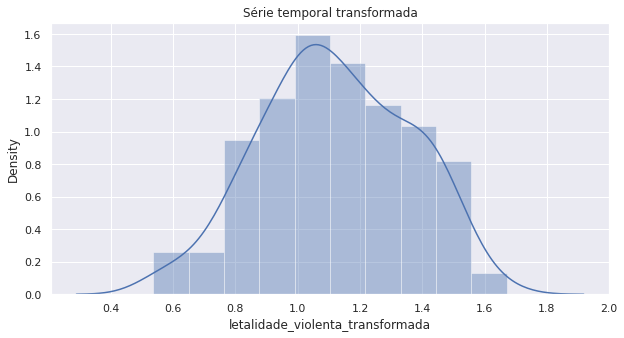

In [34]:
sns.distplot(df['letalidade_violenta_transformada'])
plt.title('Série temporal transformada')
plt.show()

In [35]:
# Teste de normalidade

# Shapiro
stat, p = shapiro(data_b10)
alpha = 0.05

print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
  print('The data looks Gaussian (Fail to reject null hypothesis)')
else:
  print('The data doe not look Gaussian (Reject H0) ')

Statistics=0.990, p=0.146
The data looks Gaussian (Fail to reject null hypothesis)


In [36]:
# D'Agostino's K^2

stat, p = normaltest(data_b10)
alpha = 0.05

print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
  print('The data looks Gaussian (Fail to reject null hypothesis)')
else:
  print('The data doe not look Gaussian (Reject H0) ')

Statistics=4.585, p=0.101
The data looks Gaussian (Fail to reject null hypothesis)


### Aplicando os modelos 

#### ARIMA

### Vamos usar 1° ordem de diferenciação por estar mais estatisticamente estácionária a série

In [ ]:
# Gerando a série estacionaria com a tecnica de diferenciação (Y' em t = Y em t - Y em t-1)
df['y_linha'] = df['letalidade_violenta'].diff()
df['y_linha_diff_2'] = ((df['letalidade_violenta'] - df['letalidade_violenta'].shift(1)) -
                        (df['letalidade_violenta'].shift(1) - df['letalidade_violenta'].shift(2)))

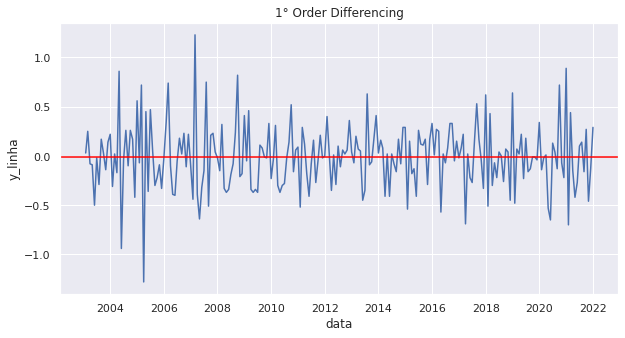

ADF Statistic: -3.87416657703761
p-value: 0.0022334104770876844
Critical Values:
	1%: -3.4612821203214907
	5%: -2.875142613826617
	10%: -2.574020122281422


In [ ]:
sns.lineplot(data=df, x='data', y='y_linha')
plt.title('1° Order Differencing')
plt.axhline(df['y_linha'].mean(), color='red')
plt.show()

# Teste para ver se a série é estacionária
result = adfuller(df['y_linha'].dropna())
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

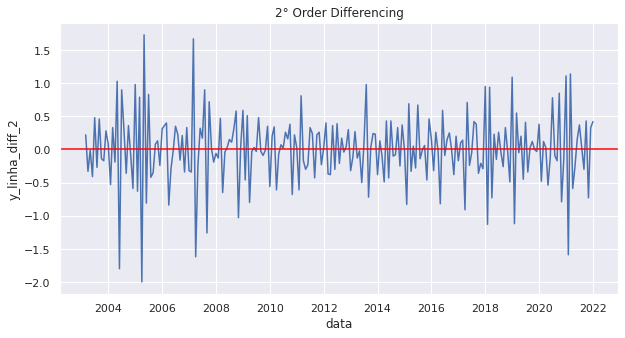

ADF Statistic: -11.235450614704202
p-value: 1.862270816046579e-20
Critical Values:
	1%: -3.4612821203214907
	5%: -2.875142613826617
	10%: -2.574020122281422


In [ ]:
sns.lineplot(data=df, x='data', y='y_linha_diff_2')
plt.title('2° Order Differencing')
plt.axhline(df['y_linha_diff_2'].mean(), color='red')
plt.show()

# Teste para ver se a série é estacionária
result = adfuller(df['y_linha_diff_2'].dropna())
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

#### Identificando os termos AR e MA do ARIMA através do ACF e PACF plot

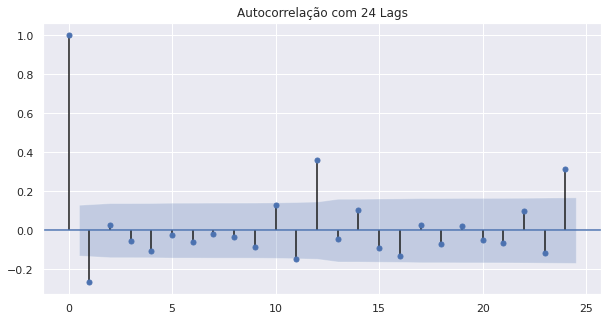

In [ ]:
plot_acf(df['y_linha'].dropna(),lags=24)
plt.title('Autocorrelação com 24 Lags')
plt.show()

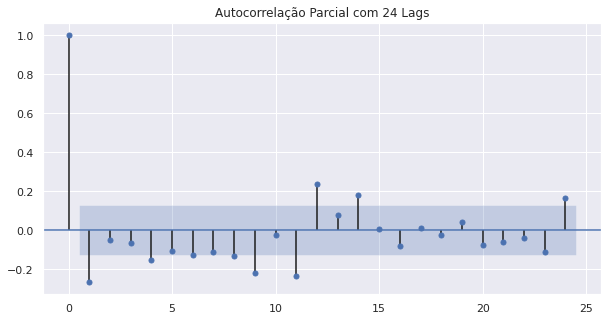

In [ ]:
plot_pacf(df['y_linha'].dropna(),lags=24)
plt.title('Autocorrelação Parcial com 24 Lags')
plt.show()

#### Ajustando o modelo ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                               ARIMA Model Results                               
Dep. Variable:     D.letalidade_violenta   No. Observations:                  215
Model:                    ARIMA(2, 1, 2)   Log Likelihood                 -50.291
Method:                          css-mle   S.D. of innovations              0.305
Date:                   Sat, 02 Apr 2022   AIC                            112.582
Time:                           13:45:28   BIC                            132.806
Sample:                                1   HQIC                           120.754
                                                                                 
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.0114      0.007     -1.662      0.098      -0.025       0.002
ar.L1.D.letalidade_violenta    -0.4289      0.094     -4

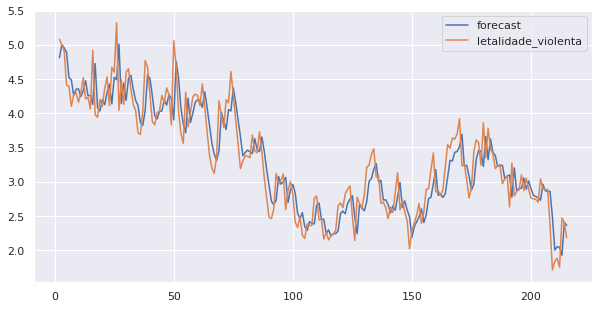

In [ ]:
# Separando dados de treino e teste
train = df['letalidade_violenta'].dropna()[:216]
test = df['letalidade_violenta'].dropna()[216:]

# Ajustando o modelo
arima_model = ARIMA(train, order=(2,1,2))
model = arima_model.fit()
print(model.summary())
model.plot_predict(dynamic=False)
plt.show()

#### Performance do modelo

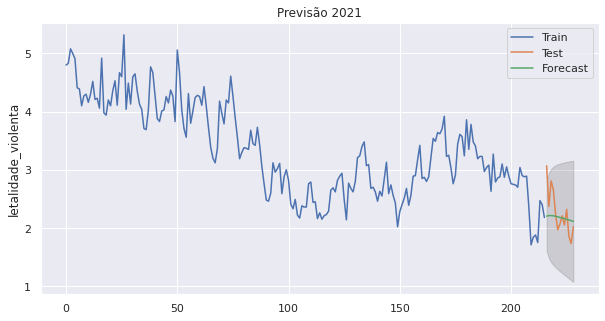

Performance do modelo
----------------------
MAPE: 11.41%
MPE: -1.5%
MAE: 0.27
RMSE: 0.36
CORR: 0.7

 Taxa de letalidade 2021
---------------------------
Taxa em 2021 real: 29.38
Taxa em 2021 prevista 28.27

Media mensal real: 2.26
Media mensal prevista 2.17


In [ ]:
# Output do modelo para 2021
fc, se, conf = model.forecast(13, alpha=0.05)

fc_series = pd.Series(fc, index = test.index)
lower_series = pd.Series(conf[:, 0], index = test.index)
upper_series = pd.Series(conf[:, 1], index = test.index)

# Plot
sns.lineplot(data=train, label='Train')
sns.lineplot(data=test, label='Test')
sns.lineplot(data=fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=0.15)
plt.title('Previsão 2021')
plt.show()

# Performance
print('Performance do modelo')
print('----------------------')
mape = np.mean(np.abs(fc_series - test)/ np.abs(test))
mpe = np.mean((fc_series - test)/(test))
mae = np.mean(np.abs(fc_series - test))
rmse = np.mean((fc_series - test)**2)**.5
corr = np.corrcoef(fc_series, test)[0,1]

print(f'MAPE: {round(mape*100,2)}%')
print(f'MPE: {round(mpe*100,2)}%')
print(f'MAE: {round(mae,2)}')
print(f'RMSE: {round(rmse, 2)}')
print(f'CORR: {round(corr, 2)}')

print('\n Taxa de letalidade 2021')
print('---------------------------')
print('Taxa em 2021 real:', test.sum())
print('Taxa em 2021 prevista', round(fc_series.sum(), 2))
print('\nMedia mensal real:', round(test.mean(),2))
print('Media mensal prevista', round(fc_series.mean(), 2))